# Bike Sharing Assignment

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the data, and view some sample records

boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of our dataframe

In [4]:
# shape of dataset
boom_bikes.shape

(730, 16)

In [5]:
#summary of all the numeric columns in the dataset
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking the data type and number of null values in dataset
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can observe that there are no null values in any column and the datatypes of all columns are numeric.

In [7]:
# Renaming the columns for better understanding
boom_bikes.rename(columns={"yr":"year","mnth": "month", "temp": "temperature", "hum": "humidity", "cnt": "count"}, inplace= True)
boom_bikes.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
# Convert numeric data into categorical string values
boom_bikes['season'] = boom_bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bikes['month'] = boom_bikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bikes['weathersit'] = boom_bikes.weathersit.map({1: 'Clear/ Partly cloudy',2:'Mist + Cloudy',3:'Light Snow/ Light rain',4:'Snow + Fog'})
boom_bikes['weekday'] = boom_bikes.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

boom_bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear/ Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear/ Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear/ Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Drop columns that are not required
# Dropping column "instant" from the dataframe since we already have an automated index
# Dropping the "dteday" column since we already have month/year and weekday/workingday in separate columns
# Dropping "casual" and "registered" variables, as we are considering the "cnt" column as the taget variable which indicates the total number of bike rentals (including both casual and registered).

boom_bikes.drop(["instant", "dteday","casual", "registered"], axis = 1, inplace = True)

## Step 2: Data Visualisation

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
# Identify numeric and categorical variables
boom_bikes.nunique().sort_values()

year             2
holiday          2
workingday       2
weathersit       3
season           4
weekday          7
month           12
temperature    498
humidity       594
windspeed      649
atemp          689
count          695
dtype: int64

### Visualization of Numerical Variables

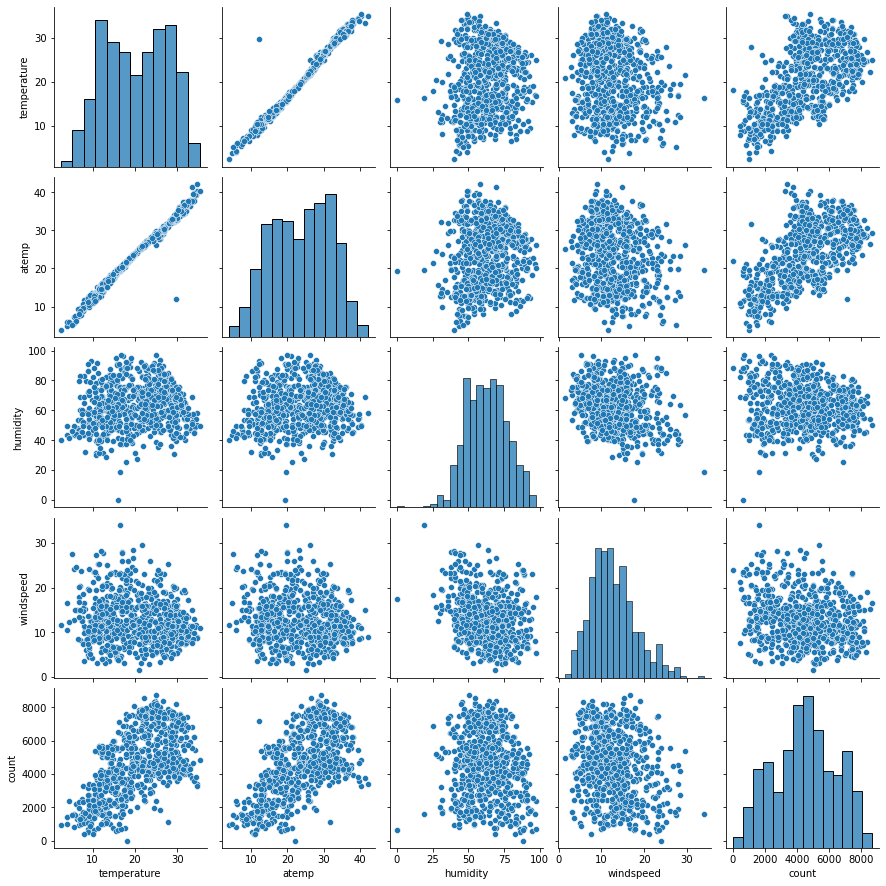

In [12]:
#Pairplot for numeric variables (to check for multicollinearity)
num_variables = ["temperature", "atemp", "humidity", "windspeed", "count"]
sns.pairplot(data = boom_bikes, vars = num_variables)
plt.show()

From above we observe that atemp and temperature variables are highly correlated which is a case of multicollinearity therefore better to drop one of them.

In [13]:
# Drop "atemp" column to avoid multicollinearity
boom_bikes.drop("atemp", axis = 1, inplace= True)

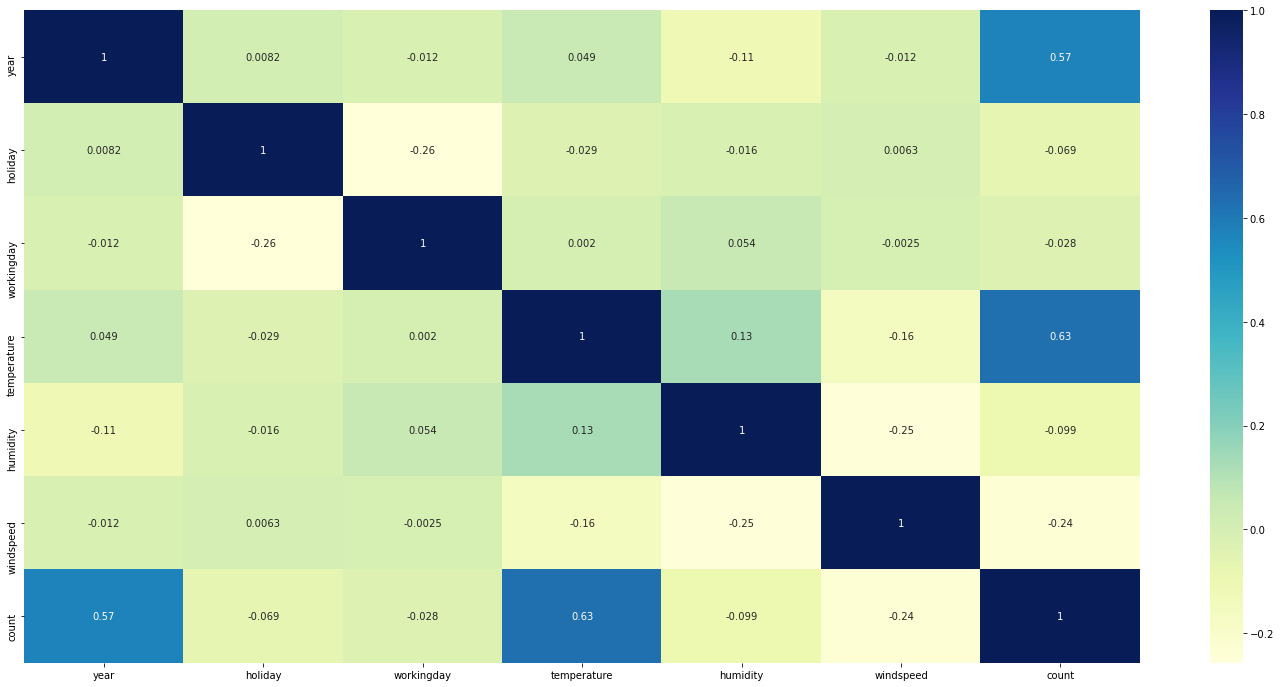

In [14]:
# Heatmap to observe correlation between variables
plt.figure(figsize=(25,12))
sns.heatmap(boom_bikes.corr(), cmap='YlGnBu', annot = True)
plt.show()

- From above we can observe that the target variable 'count' has good correlation with 'temperature'. 
- Target variable 'count' has good correlation with 'year' as well.
- Therefore we can say that both these variables could be the important variables in building the linear model.

### Visualization of Categorical Variables

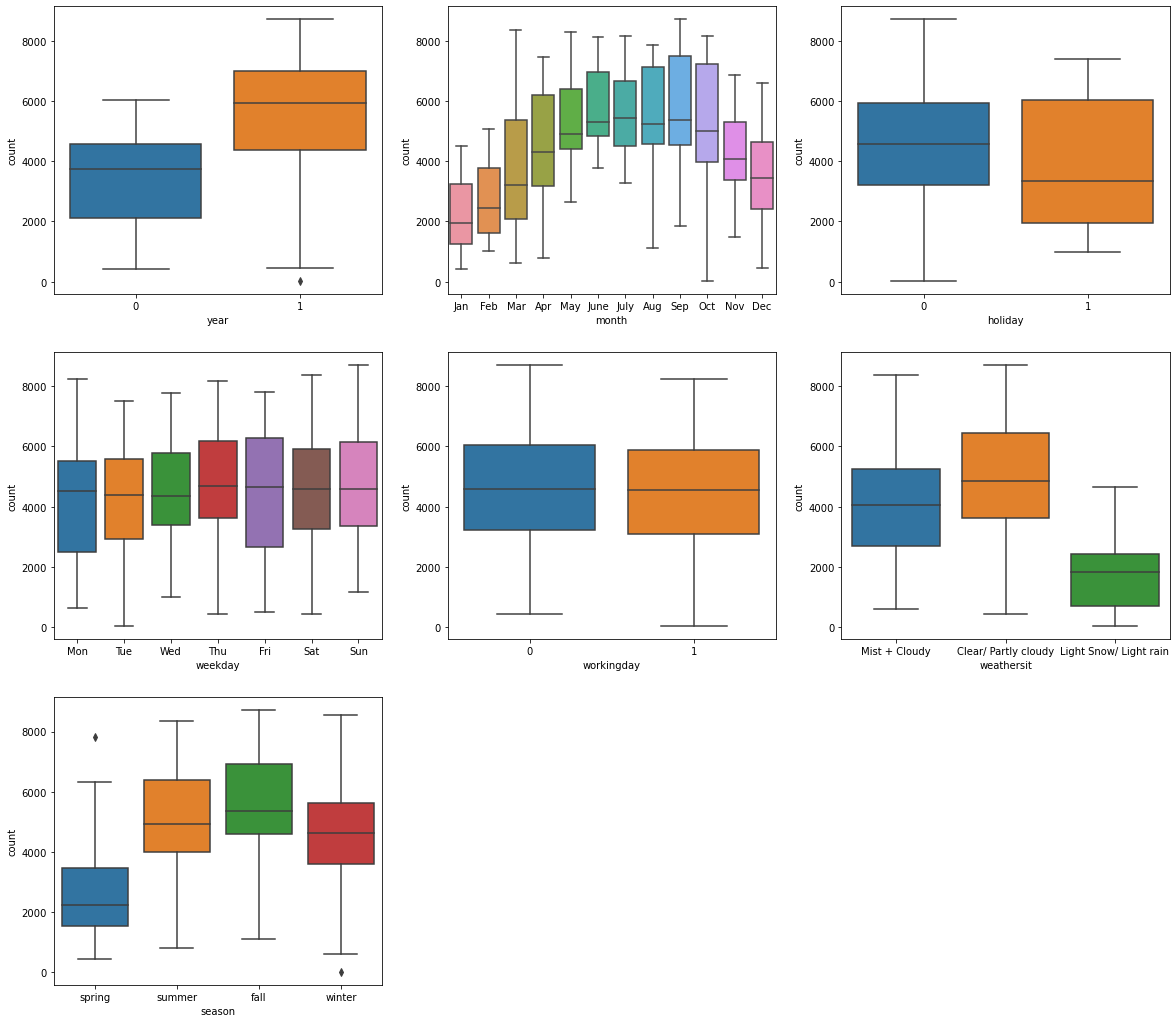

In [15]:
# Box plot between categorical and continuous variable
cat_variables = ["year", "month", "holiday", "weekday", "workingday", "weathersit", "season"]
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x = "year", y = "count", data = boom_bikes)

plt.subplot(3,3,2)
sns.boxplot(x = "month", y = "count", data = boom_bikes)

plt.subplot(3,3,3)
sns.boxplot(x = "holiday", y = "count", data = boom_bikes)

plt.subplot(3,3,4)
sns.boxplot(x = "weekday", y = "count", data = boom_bikes)

plt.subplot(3,3,5)
sns.boxplot(x = "workingday", y = "count", data = boom_bikes)

plt.subplot(3,3,6)
sns.boxplot(x = "weathersit", y = "count", data = boom_bikes)

plt.subplot(3,3,7)
sns.boxplot(x = "season", y = "count", data = boom_bikes)

plt.show()


From above we can observe that:
- More number of bikes were rented in 2019 as compared to 2018
- Bike were rented the most in the month of July
- Bikes rented during holidays is less
- Bikes were rented more during the clear weather/ partly cloudy situation
- Bikes were rented more during the fall season followed by the summer season

## Step 3: Data Preparation

In [16]:
boom_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear/ Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear/ Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear/ Partly cloudy,9.305237,43.6957,12.522300,1600


### Dummy variables

In [17]:
# Get the dummy variables for season, month, weathersit, weekday
month = pd.get_dummies(boom_bikes.month, drop_first= True)
weekday = pd.get_dummies(boom_bikes.weekday, drop_first= True)
weathersit = pd.get_dummies(boom_bikes.weathersit, drop_first= True)
season = pd.get_dummies(boom_bikes.season, drop_first= True)

#changing the display options columns
pd.set_option('display.max_columns', 100)

In [18]:
# Concatenation of the dummy variables
dummy_vars = pd.concat([month, weekday, weathersit, season], axis= 1)

In [19]:
# Add the results to the original dataframe
boom_bikes = pd.concat([dummy_vars, boom_bikes], axis = 1)
boom_bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/ Light rain,Mist + Cloudy,spring,summer,winter,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear/ Partly cloudy,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear/ Partly cloudy,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear/ Partly cloudy,9.305237,43.6957,12.522300,1600


In [20]:
# Drop columns as we have created the dummies for them
boom_bikes.drop(["season", "month", "weekday", "weathersit"], axis= 1, inplace = True)

In [21]:
boom_bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/ Light rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temperature,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [22]:
# Shape of the dataset
boom_bikes.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

In [23]:
from sklearn.model_selection import train_test_split

#Spliting into train and test data
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes, train_size = 0.7, random_state = 100)

In [24]:
# Printing the shape of train and test dataset
print("Train_dataset_shape:", boom_bikes_train.shape)
print("Test_dataset_shape:",boom_bikes_test.shape)

Train_dataset_shape: (510, 29)
Test_dataset_shape: (220, 29)


### Rescaling the Features 

In [25]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaler
Scaler = MinMaxScaler()

In [26]:
# Apply Scaler to independent numerical variable in train dataset
num_vars = ["temperature", "humidity", "windspeed", "count"]
boom_bikes_train[num_vars] = Scaler.fit_transform(boom_bikes_train[num_vars])

In [27]:
boom_bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/ Light rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temperature,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [28]:
# Statistical summary of train data after scaling
boom_bikes_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/ Light rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temperature,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- From above we can observe that scaling has been done perfectly with all numeric variables now mapped between 0 and 1.

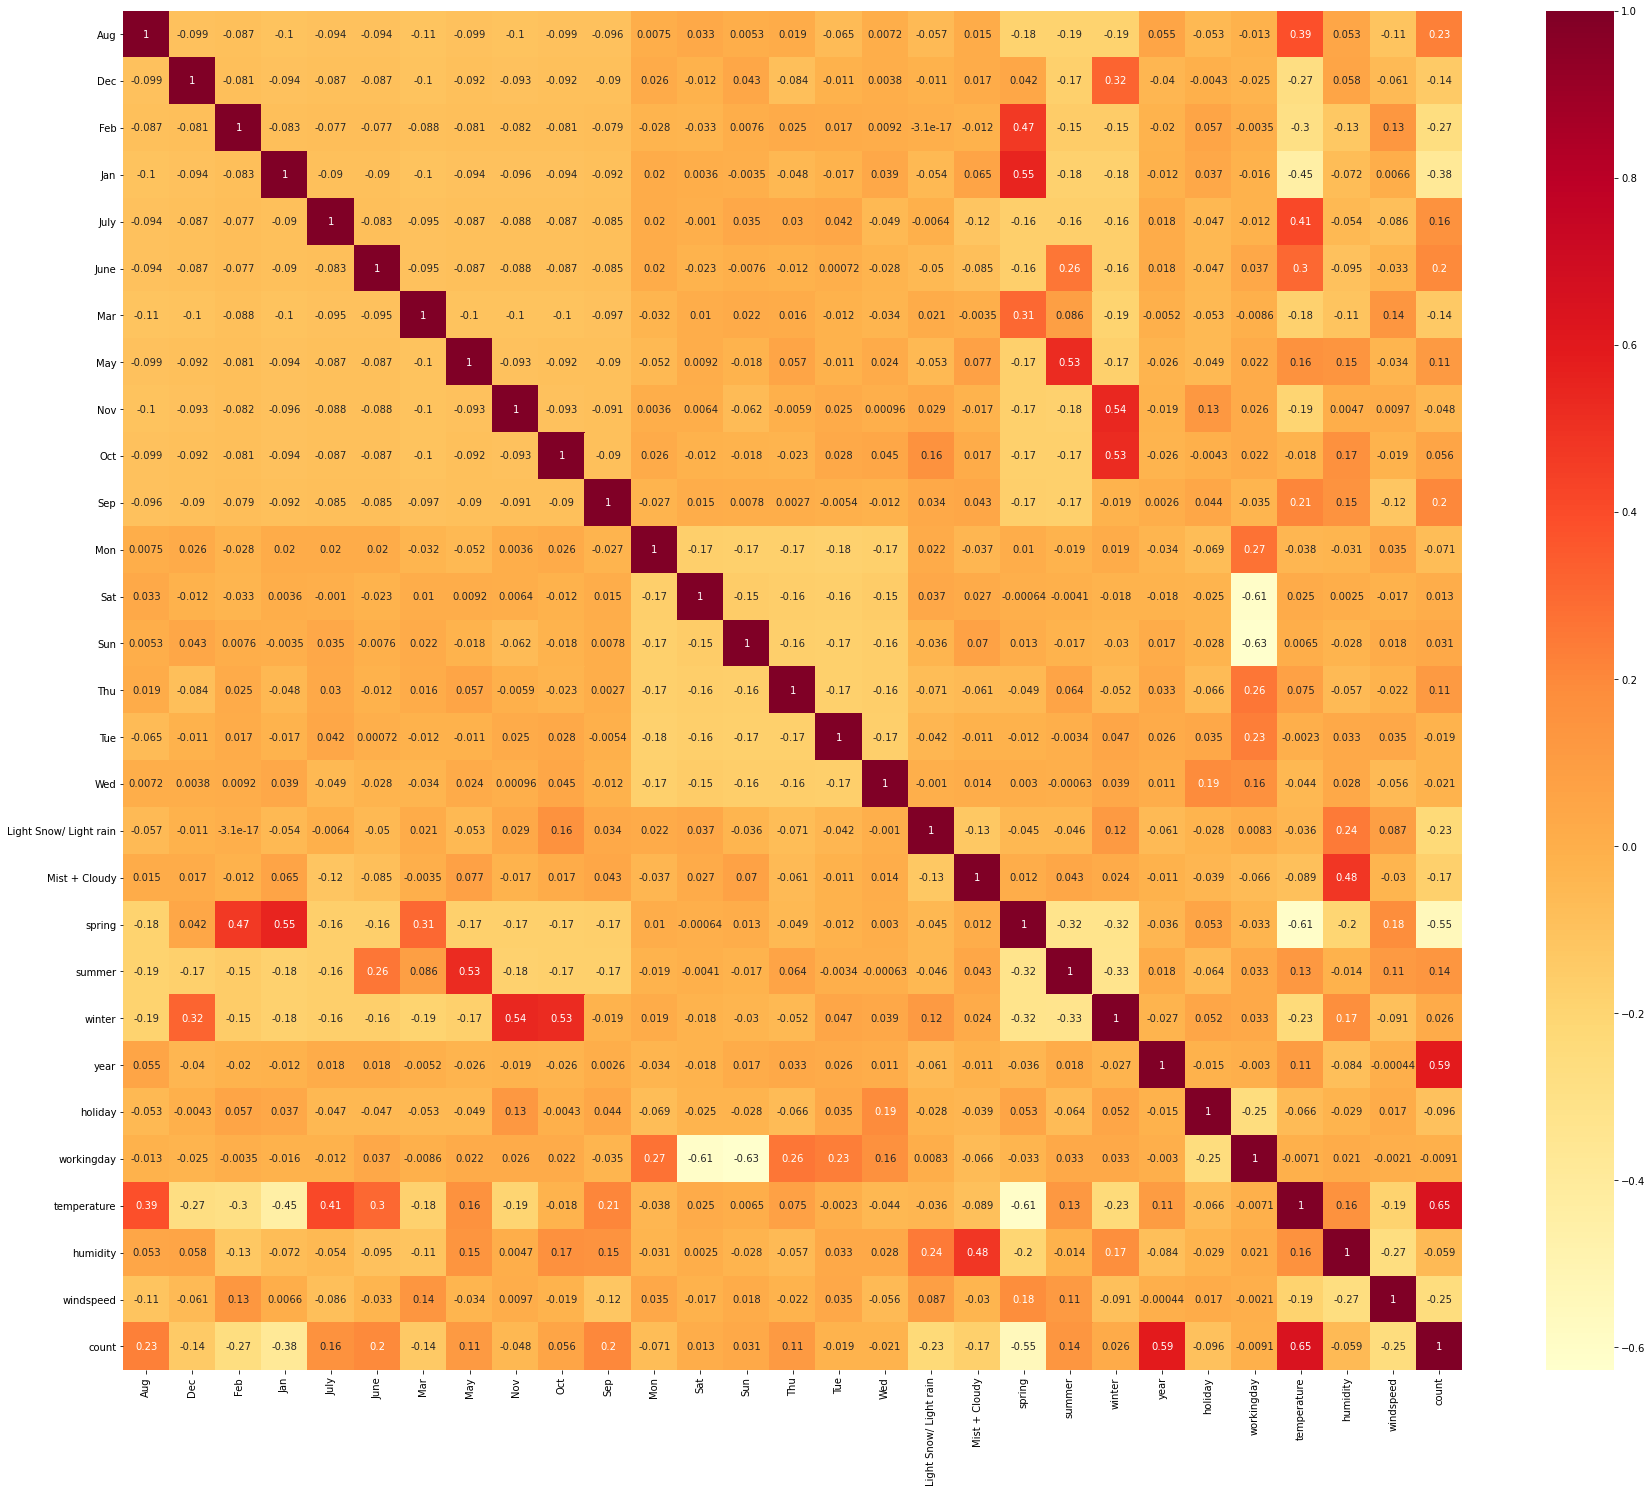

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize= (30,25))
sns.heatmap(boom_bikes_train.corr(), annot= True, cmap = "YlOrRd")
plt.show()

From above we can observe that:
- There is a positive high correlation between temperature and count as well as between year and count
- There is a negative high correlation between jan and count as well as between spring and count
- We can also observe the correation between independent variables to check for multicollinearity

### Dividing into X and Y sets for the model building

In [30]:
# Dividing into X and Y sets for the model building
y_train = boom_bikes_train.pop('count')
X_train = boom_bikes_train

## Step 5: Building a linear model

Recursive Feature Elimination (RFE)

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow/ Light rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [34]:
# list of columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow/ Light rain',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'temperature', 'humidity', 'windspeed'],
      dtype='object')

In [35]:
# list of columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

### Building model using statsmodel

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm_1 = sm.add_constant(X_train_rfe)

In [38]:
# Running the 1st linear model 
lm_1 = sm.OLS(y_train,X_train_rfe_lm_1).fit()

In [39]:
#Statistical summary of 1st linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          8.15e-189
Time:                        20:32:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3197      0.036      8.859      0.000       0.249       0.391
Dec                       -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                       -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July                      -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                       -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                        0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow/ Light rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring                    -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                     0.0423      0.015      2.761      0.006       0.012       0.072
winter                     0.1019      0.018      5.656      0.000       0.067       0.137
year                       0.2304      0.008     28.487      0.000       0.215       0.246
holiday                   -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temperature                0.4815      0.037     13.005      0.000       0.409       0.554
humidity                  -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                 -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above we can observe that:
- R squared value (0.845), and Adjusted R squared (0.840) is a good value.
- probability of F statistics is almost equal to 0 which implies that the overall model is statistically significant.
- p value of all the variables is < 0.05.

### VIF
We can not suggest that model is a good fit just by looking into R squared, Adjusted R squared and p values so we would look into VIF values for the model.

In [40]:
# Check VIF values for the linear model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by = "VIF",ascending = False, inplace = True)
vif

,Feature,VIF
13,humidity,30.89
12,temperature,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


We observe that 'humidity' is having a very high VIF value, therefore, insignificant and so can be dropped

In [41]:
# Dropping varible with high VIF
X_train_rfe.drop("humidity", axis= 1, inplace = True)

In [42]:
# Building 2nd model without the variable 'humidity'
# Adding a constant variable 

X_train_rfe_lm_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_rfe_lm_2).fit()

In [43]:
#Statistical summary of 2nd linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.75e-186
Time:                        20:32:16   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2450      0.032      7.618      0.000       0.182       0.308
Dec                       -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan                       -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July                      -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov                       -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep                        0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow/ Light rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring                    -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer                     0.0349      0.015      2.251      0.025       0.004       0.065
winter                     0.0869      0.018      4.831      0.000       0.052       0.122
year                       0.2345      0.008     28.687      0.000       0.218       0.251
holiday                   -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temperature                0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                 -0.1585      0.025     -6.276      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Check VIF values for the linear model
vif_2 = pd.DataFrame()
vif_2["Feature"] = X_train_rfe.columns
vif_2["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_2["VIF"] = round(vif_2["VIF"], 2)
vif_2.sort_values(by = "VIF",ascending = False, inplace = True)
vif_2

,Feature,VIF
12,temperature,5.17
13,windspeed,4.67
9,winter,2.95
7,spring,2.89
8,summer,2.24
10,year,2.07
3,Nov,1.81
1,Jan,1.66
2,July,1.59
6,Mist + Cloudy,1.57


We observe that 'temperature' has the highest VIF but we cannot drop it since earlier we saw that it is an important feature in model building. Therefore, we will drop 'windspeed' variable with second highest VIF.

In [45]:
# Dropping varible with high VIF
X_train_rfe.drop("windspeed", axis= 1, inplace = True)

In [46]:
# Building the 3rd model
# Adding a constant variable 

X_train_rfe_lm_3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_rfe_lm_3).fit()

In [47]:
#Statistical summary of 3rd linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          5.35e-179
Time:                        20:32:16   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1837      0.032      5.775      0.000       0.121       0.246
Dec                       -0.0332      0.018     -1.810      0.071      -0.069       0.003
Jan                       -0.0333      0.019     -1.765      0.078      -0.070       0.004
July                      -0.0512      0.019     -2.663      0.008      -0.089      -0.013
Nov                       -0.0415      0.020     -2.091      0.037      -0.081      -0.003
Sep                        0.0739      0.018      4.167      0.000       0.039       0.109
Light Snow/ Light rain    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
Mist + Cloudy             -0.0787      0.009     -8.707      0.000      -0.096      -0.061
spring                    -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer                     0.0266      0.016      1.661      0.097      -0.005       0.058
winter                     0.0902      0.019      4.834      0.000       0.054       0.127
year                       0.2332      0.008     27.496      0.000       0.217       0.250
holiday                   -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temperature                0.4624      0.037     12.346      0.000       0.389       0.536
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Check VIF values for the linear model
vif_3 = pd.DataFrame()
vif_3["Feature"] = X_train_rfe.columns
vif_3["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_3["VIF"] = round(vif_3["VIF"], 2)
vif_3.sort_values(by = "VIF",ascending = False, inplace = True)
vif_3

,Feature,VIF
12,temperature,4.30
9,winter,2.81
7,spring,2.12
10,year,2.07
8,summer,1.94
3,Nov,1.79
1,Jan,1.65
2,July,1.59
6,Mist + Cloudy,1.56
0,Dec,1.47


We observe that 'summer' has high p-value which makes it insignificant among other variables. Therefore, we will drop 'summer'.

In [49]:
# Dropping varible with high p-value and VIF
X_train_rfe.drop("summer", axis= 1, inplace = True)

In [50]:
# Building the 4th model
# Adding a constant variable 

X_train_rfe_lm_4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_rfe_lm_4).fit()

In [51]:
#Statistical summary of 4th linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.47e-179
Time:                        20:32:17   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2196      0.023      9.390      0.000       0.174       0.266
Dec                       -0.0387      0.018     -2.139      0.033      -0.074      -0.003
Jan                       -0.0381      0.019     -2.035      0.042      -0.075      -0.001
July                      -0.0624      0.018     -3.465      0.001      -0.098      -0.027
Nov                       -0.0472      0.020     -2.405      0.017      -0.086      -0.009
Sep                        0.0621      0.016      3.814      0.000       0.030       0.094
Light Snow/ Light rain    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
Mist + Cloudy             -0.0784      0.009     -8.670      0.000      -0.096      -0.061
spring                    -0.1084      0.016     -6.691      0.000      -0.140      -0.077
winter                     0.0710      0.015      4.835      0.000       0.042       0.100
year                       0.2337      0.008     27.520      0.000       0.217       0.250
holiday                   -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temperature                0.4335      0.033     13.046      0.000       0.368       0.499
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Check VIF values for the linear model
vif_4 = pd.DataFrame()
vif_4["Feature"] = X_train_rfe.columns
vif_4["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_4["VIF"] = round(vif_4["VIF"], 2)
vif_4.sort_values(by = "VIF",ascending = False, inplace = True)
vif_4

,Feature,VIF
11,temperature,3.04
8,winter,2.53
9,year,2.05
7,spring,1.93
3,Nov,1.79
1,Jan,1.65
6,Mist + Cloudy,1.53
0,Dec,1.46
2,July,1.34
4,Sep,1.20


We observe that "Jan" is insignificant in presence of other variables due to high p-value. Therefore, we will drop 'Jan'.

In [53]:
# Dropping varible with high p-value and VIF
X_train_rfe.drop("Jan", axis= 1, inplace = True)

In [54]:
# Building the 5th model
# Adding a constant variable 

X_train_rfe_lm_5 = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_rfe_lm_5).fit()

In [55]:
#Statistical summary of 5th linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          7.70e-180
Time:                        20:32:17   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2081      0.023      9.141      0.000       0.163       0.253
Dec                       -0.0306      0.018     -1.731      0.084      -0.065       0.004
July                      -0.0662      0.018     -3.685      0.000      -0.102      -0.031
Nov                       -0.0428      0.020     -2.189      0.029      -0.081      -0.004
Sep                        0.0613      0.016      3.759      0.000       0.029       0.093
Light Snow/ Light rain    -0.3044      0.026    -11.918      0.000      -0.355      -0.254
Mist + Cloudy             -0.0792      0.009     -8.738      0.000      -0.097      -0.061
spring                    -0.1164      0.016     -7.384      0.000      -0.147      -0.085
winter                     0.0715      0.015      4.850      0.000       0.043       0.100
year                       0.2331      0.009     27.382      0.000       0.216       0.250
holiday                   -0.0945      0.027     -3.477      0.001      -0.148      -0.041
temperature                0.4517      0.032     14.068      0.000       0.389       0.515
==============================================================================
Omnibus:                       74.104   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.250
Skew:                          -0.705   Prob(JB):                     9.91e-46
Kurtosis:                       5.787   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Check VIF values for the linear model
vif_5 = pd.DataFrame()
vif_5["Feature"] = X_train_rfe.columns
vif_5["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_5["VIF"] = round(vif_5["VIF"], 2)
vif_5.sort_values(by = "VIF",ascending = False, inplace = True)
vif_5

,Feature,VIF
10,temperature,2.99
7,winter,2.51
8,year,2.05
2,Nov,1.79
5,Mist + Cloudy,1.51
0,Dec,1.42
1,July,1.33
6,spring,1.29
3,Sep,1.20
4,Light Snow/ Light rain,1.07


We observe that "Dec" is insignificant in presence of other variables due to high p-value. Therefore, we will drop 'Dec'.

In [57]:
# Dropping varible with high p-value
X_train_rfe.drop("Dec", axis= 1, inplace = True)

In [58]:
# Building the 6th model
# Adding a constant variable 

X_train_rfe_lm_6 = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_rfe_lm_6).fit()

In [59]:
#Statistical summary of 6th linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.18e-180
Time:                        20:32:17   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2000      0.022      8.959      0.000       0.156       0.244
July                      -0.0681      0.018     -3.787      0.000      -0.103      -0.033
Nov                       -0.0303      0.018     -1.665      0.096      -0.066       0.005
Sep                        0.0632      0.016      3.874      0.000       0.031       0.095
Light Snow/ Light rain    -0.3010      0.026    -11.796      0.000      -0.351      -0.251
Mist + Cloudy             -0.0788      0.009     -8.673      0.000      -0.097      -0.061
spring                    -0.1151      0.016     -7.296      0.000      -0.146      -0.084
winter                     0.0623      0.014      4.521      0.000       0.035       0.089
year                       0.2333      0.009     27.350      0.000       0.217       0.250
holiday                   -0.0950      0.027     -3.491      0.001      -0.149      -0.042
temperature                0.4630      0.032     14.696      0.000       0.401       0.525
==============================================================================
Omnibus:                       69.791   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.767
Skew:                          -0.680   Prob(JB):                     4.58e-41
Kurtosis:                       5.625   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Check VIF values for the linear model
vif_6 = pd.DataFrame()
vif_6["Feature"] = X_train_rfe.columns
vif_6["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_6["VIF"] = round(vif_6["VIF"], 2)
vif_6.sort_values(by = "VIF",ascending = False, inplace = True)
vif_6

,Feature,VIF
9,temperature,2.99
7,year,2.05
6,winter,1.89
1,Nov,1.58
4,Mist + Cloudy,1.51
0,July,1.33
5,spring,1.25
2,Sep,1.20
3,Light Snow/ Light rain,1.06
8,holiday,1.06


We observe that "Nov" is insignificant in presence of other variables due to high p-value. Therefore, we will drop 'Nov'.

In [61]:
# Dropping varible with high p-value
X_train_rfe.drop("Nov", axis= 1, inplace = True)

In [62]:
# Building the 7th model
# Adding a constant variable 

X_train_rfe_lm_7 = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train, X_train_rfe_lm_7).fit()

In [63]:
#Statistical summary of 7th linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          5.25e-181
Time:                        20:32:17   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1952      0.022      8.802      0.000       0.152       0.239
July                      -0.0690      0.018     -3.833      0.000      -0.104      -0.034
Sep                        0.0654      0.016      4.015      0.000       0.033       0.097
Light Snow/ Light rain    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
Mist + Cloudy             -0.0781      0.009     -8.594      0.000      -0.096      -0.060
spring                    -0.1122      0.016     -7.143      0.000      -0.143      -0.081
winter                     0.0534      0.013      4.197      0.000       0.028       0.078
year                       0.2332      0.009     27.291      0.000       0.216       0.250
holiday                   -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temperature                0.4695      0.031     14.995      0.000       0.408       0.531
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Check VIF values for the linear model
vif_7 = pd.DataFrame()
vif_7["Feature"] = X_train_rfe.columns
vif_7["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_7["VIF"] = round(vif_7["VIF"], 2)
vif_7.sort_values(by = "VIF",ascending = False, inplace = True)
vif_7

,Feature,VIF
8,temperature,2.99
6,year,2.05
3,Mist + Cloudy,1.51
0,July,1.33
5,winter,1.33
4,spring,1.25
1,Sep,1.19
2,Light Snow/ Light rain,1.06
7,holiday,1.04


#### Now we have the final model, and we can observe that:
- R-squared = 0.822 and Adjusted R squared = 0.819
- p value is less than significance level 0.05 for all the variables which means they are statistically significant.
- VIF value of all the variables are less than 5 which indicates low correlation among independent variables.
- Probability of F statistics is almost equal to zero.
- Therefore, since VIF and p-value is in the acceptable range, and R-squared and adjusted R squared values are good enough, we can say that the model is a good fit model.

## Step 6: Residual Analysis of the Train Data

In [65]:
# calculate predicted value of y_train
y_train_pred = lm_7.predict(X_train_rfe_lm_7)

In [66]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

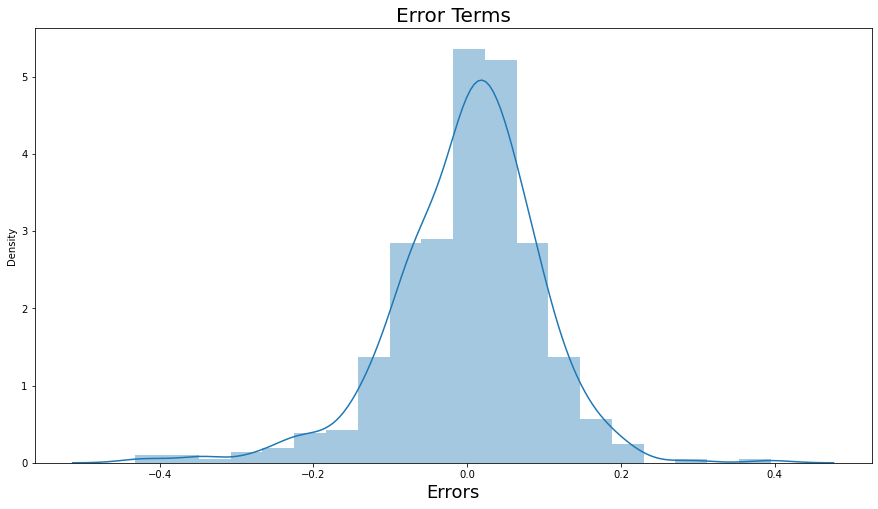

In [67]:
# Ploting Error term histogram
plt.figure(figsize=(15,8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

We can observe that the error terms are normally distributed around mean= 0. Hence, satisfying the linear model assumption.

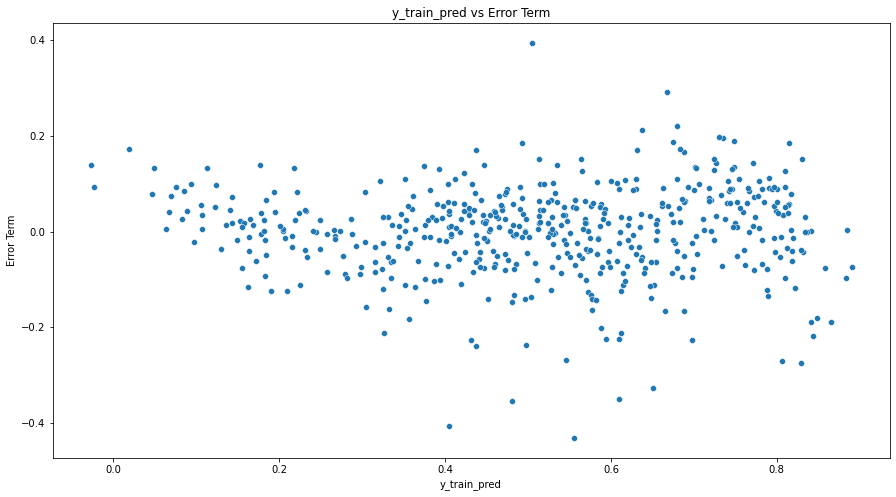

In [68]:
# Scatter plot between y_train_pred and error term
plt.figure(figsize=(15,8))
res = y_train - y_train_pred
sns.scatterplot(y_train_pred, res)
plt.xlabel("y_train_pred")
plt.ylabel("Error Term")
plt.title("y_train_pred vs Error Term")
plt.show()

We can observe no specific pattern in the error terms with respect to prediced values

## Step 7: Making Predictions
#### Applying the scaling on the test sets

In [69]:
# Scaling on the test dataset
num_vars = ["temperature", "humidity", "windspeed", "count"]
boom_bikes_test[num_vars] = Scaler.transform(boom_bikes_test[num_vars])

In [70]:
# Statistical summary of test data
boom_bikes_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/ Light rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temperature,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [71]:
# Dividing into X_test and y_test
y_test = boom_bikes_test.pop("count")
X_test = boom_bikes_test

In [72]:
# Using our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new_1 = sm.add_constant(X_test_new)

In [73]:
# Making Predictions
y_pred = lm_7.predict(X_test_new_1)

#### Finding R-squared on test set

In [74]:
#Evaluate R-square for test

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8096078487662723

#### We can observe that R-squared value of test data is not far from R-squared value of train data= 0.822, therefore, our model is a good linear model.

## Step 8: Model Evaluation

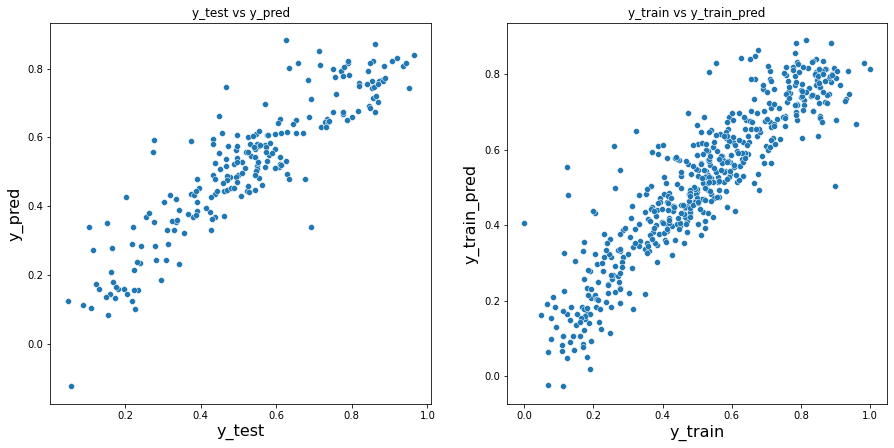

In [78]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x = y_test, y = y_pred)
plt.title("y_test vs y_pred")
plt.xlabel('y_test', fontsize= 16)                      
plt.ylabel('y_pred', fontsize= 16)  

# To understand spread of train data
plt.subplot(1,2,2)
sns.scatterplot(x = y_train, y = y_train_pred)
plt.title("y_train vs y_train_pred")
plt.xlabel('y_train', fontsize= 16)                      
plt.ylabel('y_train_pred', fontsize= 16)
plt.show()

We can see that the equation of our best fitted line is:

$ count = 0.1952 + 0.0654 \times Sep - 0.0690 \times July - 0.2993 \times (Light Snow/ Light rain) - 0.0781 \times (Mist + cloudy) - 0.1122 \times spring + 0.0534 \times winter + 0.2332 \times year - 0.1006 \times holiday + 0.4695 \times temperature $


#### Analysis and observations from final linear model:
- The overall model is good with high value of R-squared and R-adjusted square for both train and test data (difference between them <0.05) with statistically significant coefficient estimates and variables. For train data R-squared = 0.822, and for test data R squared = 0.8096 
- Based on the final model, the top 3 features contributing significantly towards explaining the demand of the shared bikes are 'temperature', 'year' and 'Light snow/ Light rain', with coefficients 0.4695, 0.2332 and −0.2993 respectively.
- 'Temperature' variable has the highest coefficient (=0.4695), which implies that a 1 unit increase in temperature, increases the rented bikes count by 0.4695.
- Some variables also have negative coefficients which implies that an increase in the value of the variable, decreases the rented bikes count.

#### Conclusion:
- BoomBikes should focus more on the variable 'temperature', since it is one of the most important factors contributing significantly towards rented bikes count.
- We can observe that demand for these bikes have increased in year 2019 as compared to in 2018.
- BoomBikes could also consider variables with positive coefficents like, September, winter since these positively affect the rented bikes count.
- Regarding the variables with negative coefficients (like July, Light Snow/ Light rain, Mist + cloudy, spring, holiday), BoomBikes could think of some attractive offers and deals to improve the rented bikes count in these cases.